Thêm thư viện

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

Kết nối với google drive

In [2]:
# kết nối với Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Kết nối file traning modal và file weight

In [3]:
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt.txt', 'MobileNetSSD_deploy.caffemodel')

Danh sách các mục có thể phân loại (detection object) được

In [5]:
categories = { 0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 
              9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 
              16: 'pottedplant', 17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor'}
# defined in list also
classes =  ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", 
            "diningtable",  "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

Nhập ảnh cần phân loại

In [52]:
image = cv2.imread('ngua.jpg')

In [53]:
(h, w) = image.shape[:2]

Xây dựng màu cho ảnh

In [54]:
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

đưa mô hình vào đọc và nhận dạng kết quả

In [55]:
net.setInput(blob)
detections = net.forward()

In [56]:
colors = np.random.uniform(255, 0, size = (len(categories), 3))

Hiển thị kết quả

In [57]:
for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence >0.2:
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        label = "{}: {:.2f}%".format(classes[idx], confidence * 100) 
        cv2.rectangle(image, (startX, startY), (endX, endY), colors[idx], 2)     
        y = startY - 15 if startY - 15>15 else startY + 15     
        cv2.putText(image, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[idx], 2)
#cv2.imshow("Output", image)
cv2.imwrite('result1.jpg', image)
#cv2.waitKey(5000)
#cv2.destroyAllWindows() 

True

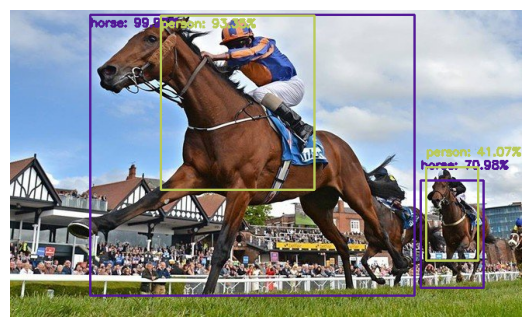

In [58]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
# ax1.set_title('object detection')
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()